##**Data Visualization Using Real World Data**
**Instructions:**
1. `Download the CSV file containing IMDB Movies data.`
2. `Clean the data, visualize and print the top 3 most popular movies of all time.`
3. `Categorize each movies using Bar Plots.`
4. `Compare and contrast the Movie Budget and Revenue using Scatter Plot.`
5. `Visualize the top movie production country using Pie Charts.`
6. `Additional Visualizations: Pairplot for Budget, Revenue, and Popularity`

In [31]:
# Install matplotlib and seaborn on Google Colab
!pip install matplotlib
!pip install seaborn

# Install locally
# pip install matplotlib
# pip install seaborn

In [32]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

### **1. Download the CSV file containing IMDB Movies data.**

In [33]:
import gdown

# Convert the Google Drive "view" link to a "download" link
file_id = "1pJg8JRwmb4O5uo-diBgIWroHK9NtIQVk"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "data.csv"  # You can name it whatever you want
gdown.download(download_url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1pJg8JRwmb4O5uo-diBgIWroHK9NtIQVk
From (redirected): https://drive.google.com/uc?id=1pJg8JRwmb4O5uo-diBgIWroHK9NtIQVk&confirm=t&uuid=9c1ead57-1359-406f-a63c-f52503e7cca4
To: /content/data.csv
100%|██████████| 403M/403M [00:04<00:00, 82.5MB/s]


'data.csv'

In [34]:
# Read the CSV file
df = pd.read_csv(output)
df.head()

,id,title,vote average,vote count,status,Release Date,REVENUE,runtime,adult,bUDget,...,Original Language,Original Title,overview,Popularity,Tagline,genres,production_companies,production_countries,spoken_languages,Keywords
0,27205,Inception,8.364,34495,Released,7/15/2010,"$825,532,764.00",148,False,"$160,000,000.00",...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,11/5/2014,"$701,729,206.00",169,False,"$165,000,000.00",...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...",,English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,7/16/2008,"$1,004,558,444.00",152,False,"$185,000,000.00",...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,12/15/2009,"$2,923,706,026.00",162,False,"$237,000,000.00",...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,4/25/2012,"$1,518,815,515.00",143,False,"$220,000,000.00",...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


### **2. Clean the data, visualize and print the top 3 most popular movies of all time.**

In [35]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                                                                         Non-Null Count    Dtype  
---  ------                                                                         --------------    -----  
 0   id                                                                             1048575 non-null  int64  
 1   title                                                                          1048562 non-null  object 
 2   vote average                                                                   1048575 non-null  float64
 3                       vote count                                                 1048575 non-null  int64  
 4   status                                                                         1048575 non-null  object 
 5   Release Date                                                                   866758 non-null   object 
 6     

Index(['id    ', 'title       ', 'vote average           ',
       '                    vote count               ',
       'status                  ', 'Release Date     ',
       '              REVENUE           ', 'runtime                    ',
       '  adult  ', 'bUDget        ', 'imdb id            ',
       'Original Language             ', '    Original Title   ',
       '           overview        ', '       Popularity              ',
       '    Tagline             ',
       '                            genres                                           ',
       '                     production_companies                      ',
       '                production_countries                   ',
       '                   spoken_languages                       ',
       '                              Keywords                    '],
      dtype='object')

In [36]:
df.columns = df.columns.str.strip()

df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   title                 1048562 non-null  object 
 2   vote average          1048575 non-null  float64
 3   vote count            1048575 non-null  int64  
 4   status                1048575 non-null  object 
 5   Release Date          866758 non-null   object 
 6   REVENUE               1048575 non-null  object 
 7   runtime               1048575 non-null  int64  
 8   adult                 1048575 non-null  bool   
 9   bUDget                1048575 non-null  object 
 10  imdb id               560572 non-null   object 
 11  Original Language     1048575 non-null  object 
 12  Original Title        1048562 non-null  object 
 13  overview              832751 non-null   object 
 14  Popularity            1048575 non-

Index(['id', 'title', 'vote average', 'vote count', 'status', 'Release Date',
       'REVENUE', 'runtime', 'adult', 'bUDget', 'imdb id', 'Original Language',
       'Original Title', 'overview', 'Popularity', 'Tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'Keywords'],
      dtype='object')

In [37]:
# Convert 'Release Date' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], format="%m/%d/%Y", errors='coerce')

# Sort the DataFrame by 'Release Date' in ascending order
df = df.sort_values(by='Release Date')

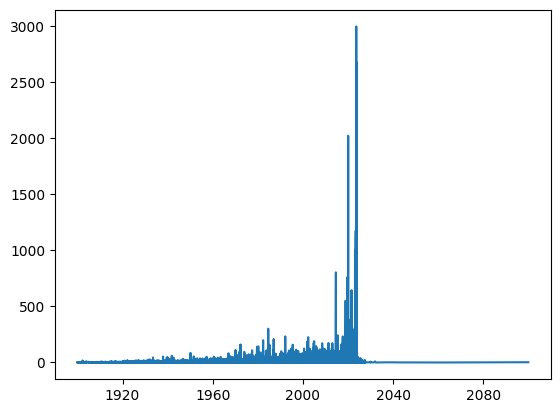

In [38]:
# Generate Plot
plt.plot(df['Release Date'], df['Popularity'])

plt.show()

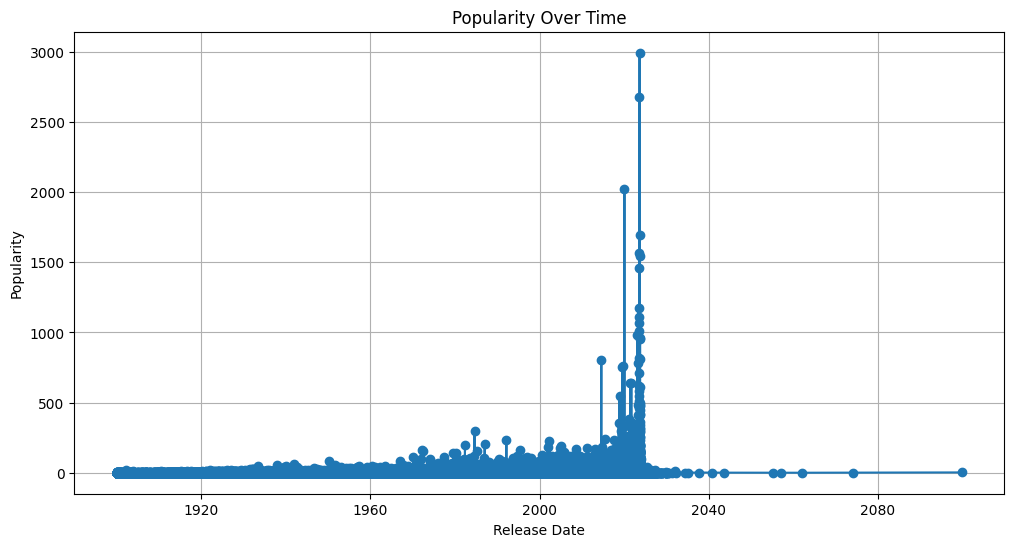

In [39]:
# Create the Line Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Release Date'], df['Popularity'], marker = 'o', linestyle = '-')

# Labels and Title
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.grid()
plt.title('Popularity Over Time')

# Show the Plot
plt.show()

In [40]:
# Filter movies with popularity greater than 2000
popular_movies = df[df['Popularity'] > 2000]

# Print only the movie titles
print(popular_movies[['title', 'Popularity']])

                                                   title  Popularity
51845  A Female Boss with Big Tits and Her Cherry Boy...    2020.286
5048                                        Gran Turismo    2680.593
3873                                         Blue Beetle    2994.357


### **3. Categorize each movies using Bar Plots.**

In [41]:
print(df['genres'].value_counts())

genres
Documentary                                       120668
Drama                                              98981
Comedy                                             55356
Animation                                          28577
Music                                              23134
                                                   ...  
Family, Action, Drama, Romance                         1
Family, Comedy, Mystery, TV Movie                      1
Family, Fantasy, Adventure, Science Fiction            1
Action, Thriller, Science Fiction, Mystery             1
Animation, Adventure, Science Fiction, Fantasy         1
Name: count, Length: 13117, dtype: int64


In [42]:
# Split genres by comma and expand into separate rows
df_exploded = df.assign(genres=df['genres'].str.split(', ')).explode('genres')

# Count occurrences of each individual genre
genre_counts = df_exploded['genres'].value_counts()

print(genre_counts)

genres
Drama              212383
Documentary        147757
Comedy             132107
Animation           52775
Horror              50804
Romance             50471
Music               45047
Thriller            45005
Action              42584
Crime               32005
Family              26390
TV Movie            22637
Adventure           22502
Fantasy             21594
Science Fiction     20324
Mystery             19110
History             15442
War                  9834
Western              8333
Name: count, dtype: int64


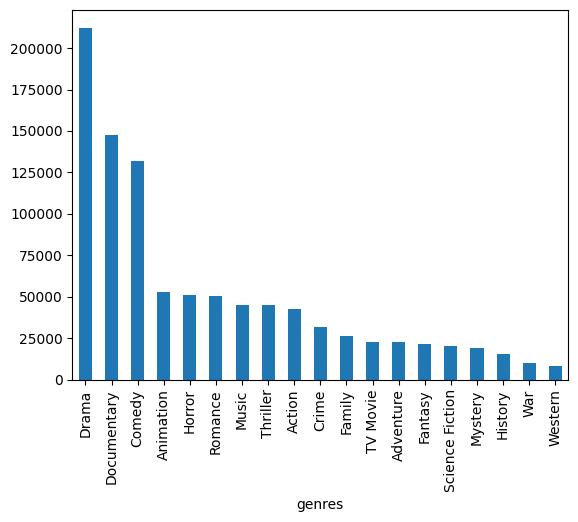

In [43]:
genre_counts.plot(kind = 'bar')
plt.show()

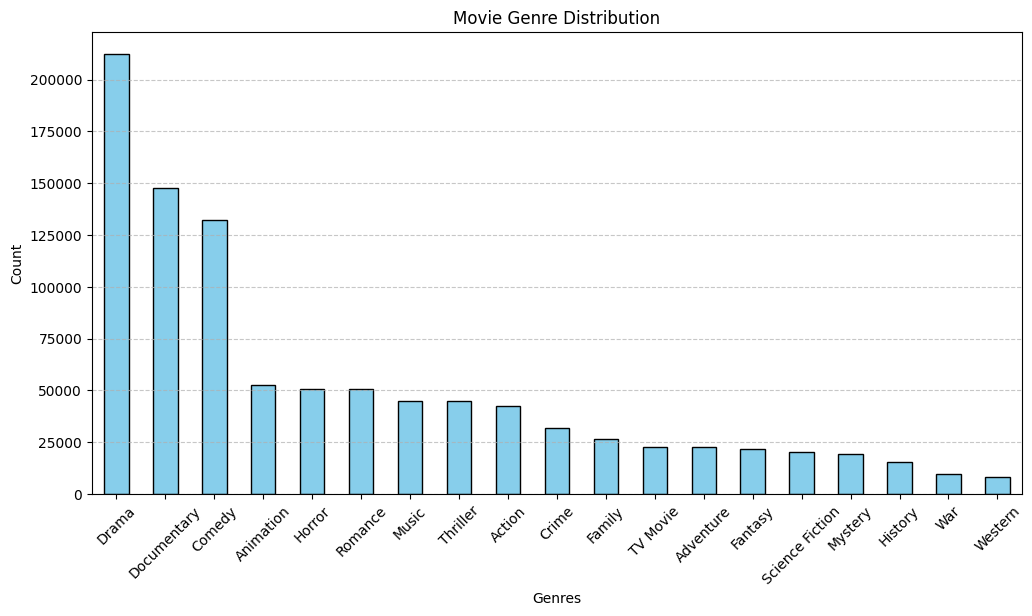

In [44]:
# Resize
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color = 'skyblue', edgecolor = 'black')

# x and y axis labels
plt.xlabel("Genres")
plt.ylabel("Count")

# Add a title
plt.title("Movie Genre Distribution")

# Other edits
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the Plot
plt.show()

### **4. Compare and contrast the Movie Budget and Revenue using Scatter Plot.**

In [45]:
df.head()

,id,title,vote average,vote count,status,Release Date,REVENUE,runtime,adult,bUDget,...,Original Language,Original Title,overview,Popularity,Tagline,genres,production_companies,production_countries,spoken_languages,Keywords
877151,23605,annoter lady innocent,0.000,0,Released,1900-01-01,$-,0,True,$-,...,en,annoter lady innocent,NaN,0.600,NaN,NaN,NaN,NaN,NaN,NaN
55628,119977,The Cabbage-Patch Fairy,5.059,17,Released,1900-01-01,$-,1,False,$-,...,xx,"La fée aux choux, ou la naissance des enfants",The fairy at a cabbage patch hovers over the b...,1.256,NaN,Fantasy,Gaumont,France,No Language,"fairy, woman director"
55629,119976,At the Floral Ball,4.800,17,Released,1900-01-01,$-,2,False,$-,...,fr,Au Bal de flore,"A turn-of-the-last-century hand-tinted short, ...",1.246,NaN,Music,Gaumont,France,No Language,"dance, dance performance, ball, silent film, l..."
967870,861377,Tango argentino,0.000,0,Released,1900-01-01,$-,0,False,$-,...,es,Tango argentino,"Produced by Casa Lepage, it is the first appea...",0.600,NaN,NaN,NaN,Argentina,No Language,NaN
277446,625773,Les miracles du Brahmine,5.000,1,Released,1900-01-01,$-,4,False,$-,...,fr,Les miracles du Brahmine,NaN,0.600,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Remove characters
df['bUDget'] = df['bUDget'].str.replace('[$,]', '', regex=True).str.strip()
df['REVENUE'] = df['REVENUE'].str.replace('[$,]', '', regex=True).str.strip()

# Convert to numeric
df['bUDget'] = pd.to_numeric(df['bUDget'], errors='coerce')
df['REVENUE'] = pd.to_numeric(df['REVENUE'], errors='coerce')
df.dropna(subset=['bUDget', 'REVENUE'], inplace=True)

In [47]:
#MINIMUM
print('$',np.min(df['bUDget']))
print('$',np.min(df['REVENUE']))

$ 1.0
$ 1.0


In [48]:
#MAXIMUM
print('$',np.max(df['bUDget']))
print('$',np.max(df['REVENUE']))

$ 900000000.0
$ 4999999999.0


In [49]:
#AVERAGE
print('$',np.mean(df['bUDget']))
print('$',np.mean(df['REVENUE']))

$ 17782406.11083657
$ 52425783.70638899


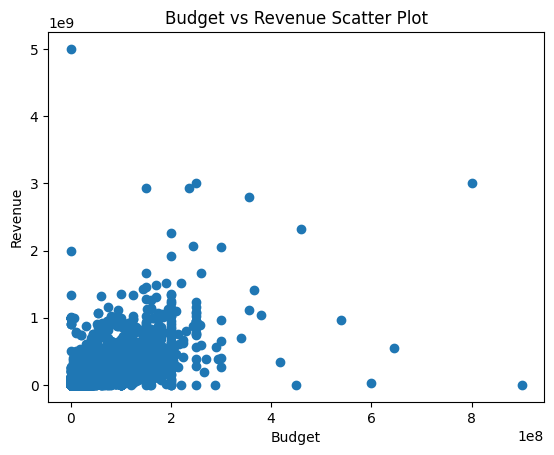

In [50]:
# Create scatter plot
plt.scatter(df['bUDget'], df['REVENUE'])

# Labels and title
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue Scatter Plot")

# Show plot
plt.show()

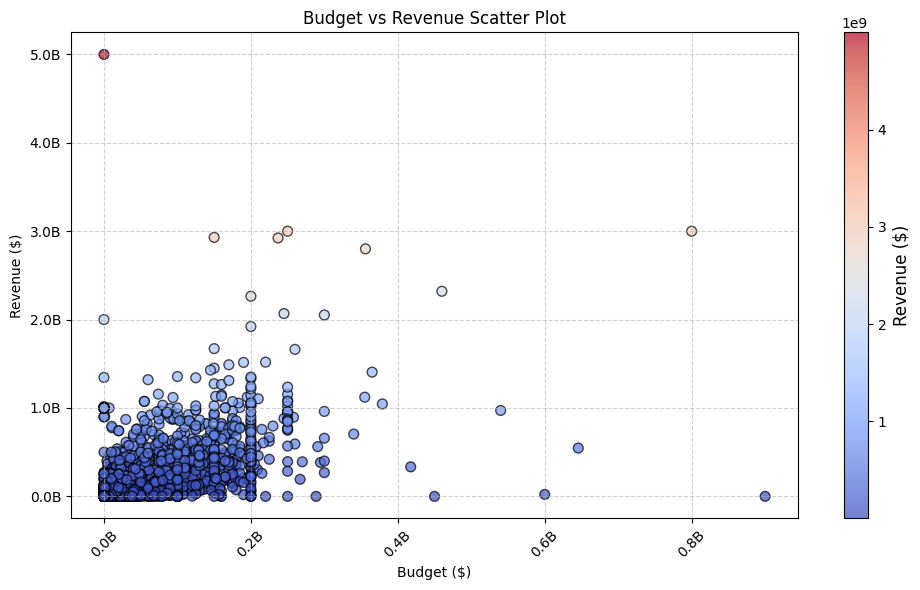

In [51]:
import matplotlib.ticker as mtick  # Import ticker module for formatting

# Create figure
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = plt.scatter(
    df['bUDget'], df['REVENUE'],
    c=df['REVENUE'], cmap='coolwarm',
    s=50, alpha=0.7, edgecolors='black'
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label("Revenue ($)", fontsize=12)

# Labels and title
plt.xlabel("Budget ($)")
plt.ylabel("Revenue ($)")
plt.title("Budget vs Revenue Scatter Plot")

# Format y-axis and x-axis to display in billions (B)
formatter = mtick.FuncFormatter(lambda x, _: f'{x/1e9:1.1f}B')  # Convert to B
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Improve readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

### **5. Visualize the top movie production country using Pie Charts.**

In [52]:
print(df['production_countries'].value_counts())

production_countries
United States of America                    5509
India                                        665
United Kingdom, United States of America     348
United Kingdom                               301
Russia                                       202
                                            ... 
Japan, Thailand                                1
Greece, Philippines                            1
Czech Republic, France, Germany                1
Netherlands, Luxembourg                        1
India, Bhutan                                  1
Name: count, Length: 966, dtype: int64


In [53]:
countries_exploded = df.assign(country=df['production_countries'].str.split(', ')).explode('country')

countries_exploded = countries_exploded.dropna(subset=['country'])

# Count occurrences of each individual country
country_counts = countries_exploded['country'].value_counts()

# Rename countries with less than 200 occurrences to "Others"
countries_exploded['country'] = countries_exploded['country'].apply(lambda x: x if country_counts[x] >= 200 else 'Others')

# Recount after renaming
final_country_counts = countries_exploded['country'].value_counts()

print(final_country_counts)

country
United States of America    7410
Others                      2379
United Kingdom              1264
France                       823
India                        733
Germany                      561
Canada                       522
China                        289
Japan                        269
Spain                        269
Italy                        261
Russia                       242
Australia                    237
Brazil                       211
Name: count, dtype: int64


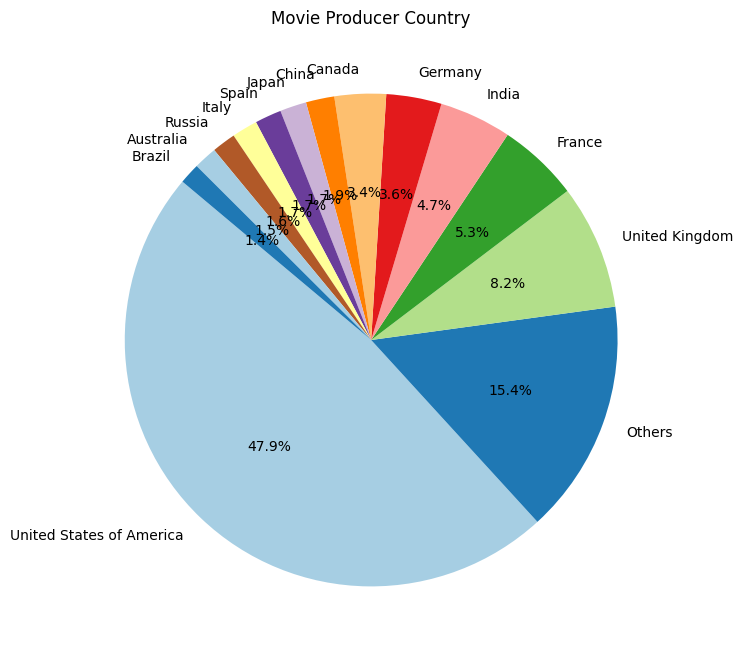

In [54]:
# Resize figure
plt.figure(figsize=(8, 8))

# Create pie chart
plt.pie(final_country_counts, labels = final_country_counts.index, autopct = '%1.1f%%', startangle = 140, colors = plt.cm.Paired.colors)

# Add title
plt.title("Movie Producer Country")

# Show plot
plt.show()

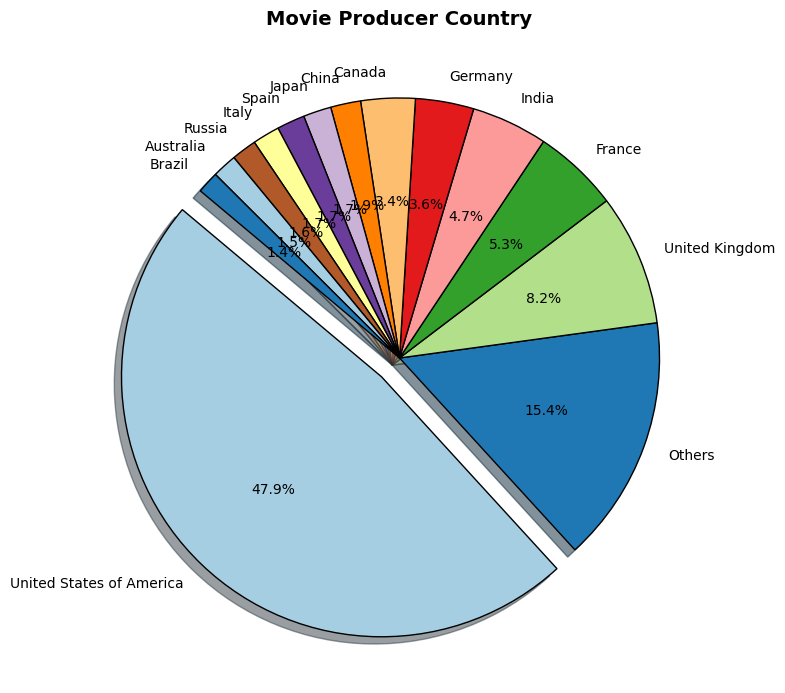

In [56]:
# Resize figure
plt.figure(figsize=(8, 8))

# Find the largest country count to explode it
explode = [0.1 if count == final_country_counts.max() else 0 for count in final_country_counts.values]

# Create pie chart
plt.pie(final_country_counts, labels=final_country_counts.index,
        autopct='%1.1f%%', startangle=140,
        colors=plt.cm.Paired.colors,
        explode=explode, shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})

# Add title
plt.title("Movie Producer Country", fontsize=14, fontweight="bold")

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

### **6. Additional Visualizations: Pairplot for Budget, Revenue, and Popularity**

<Figure size 1000x1000 with 0 Axes>

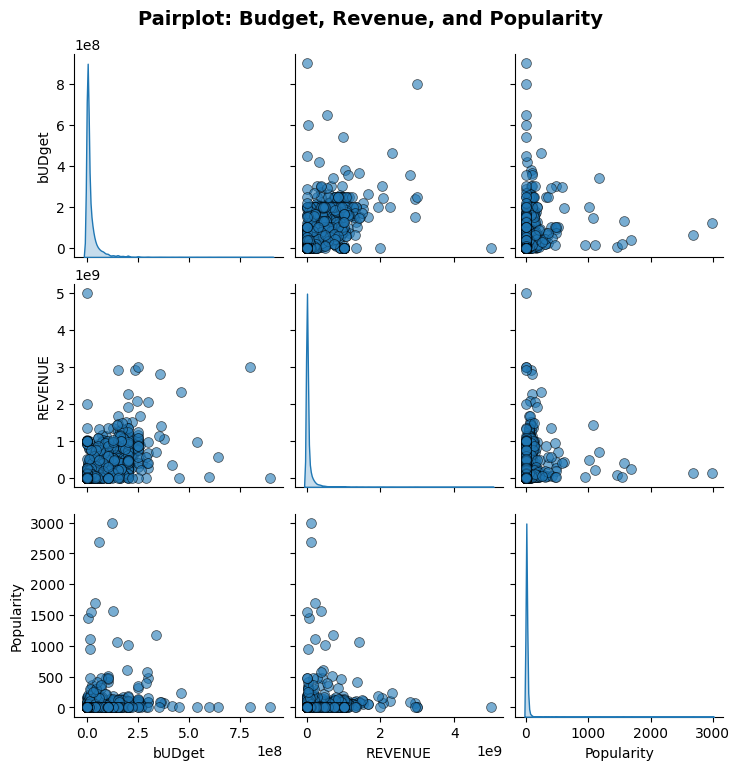

In [57]:
# Pairplot: Budget, Revenue, and Popularity
plt.figure(figsize=(10, 10))
sns.pairplot(df[['bUDget', 'REVENUE', 'Popularity']], diag_kind="kde", plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': "k"})

# Add title
plt.suptitle("Pairplot: Budget, Revenue, and Popularity", y=1.02, fontsize=14, fontweight="bold")

# Show plot
plt.show()